## Logistic Regression

### PART 1

**1. Why is output of σ in the interval (0, 1)?**

The sigmoid function σ(z) = 1/(1+e^-z)  

The sigmoid function's numerator is 1 and its denominator is greater than 1. Denominator is always larger than numerator, so the output will be between 0 and 1.  

The term e^-z is an exponential function. As x increases, e^-z approaches 0. So σ(z) = 1/1+0 = 0  

As x decreases, e^-z becomes very large. So σ(z) = 1/1+ ∞ = 1  

No matter how large or negative the input x, the output σ(x) will always be between 0 and 1.
and 1.



**2. Why the output of σ cannot equal 0 or 1?**

Since, the sigmoid function σ(z) = 1/(1+e­^-z )  

If  z → −∞, then e^-z → ∞ and 1/(1+e^-z) approaches to 0 but never equals to 0.  

e^-z  become ∞, so denominator will be ∞,  and σ(z) becomes close to 0  

In the same way, z → ∞, then e^-z → -∞ and 1/(1+e^-z) approaches to 1 but never equals to 1.  

e^-z becomes 0, so denominator will be 1+0 and σ(z) becomes close to 1  

The fact that σ(z) doesn't reach exactly 0 or 1 is important in machine learning algorithm such as logistic regression. For example, probabilities are modeled between 0 and 1, but never as certainties (which would correspond to exactly 0 or 1). This keeps gradient-based optimization methods stable.
.
   

**3. For what value of z is σ(z) = 0.5?**
   
σ(z) = 1/(1+e^-z)  

 0.5 = 1/(1+e^-z)  
 
 1+e^-z = 1/(0.5)  
 
 1+e^-z = 2  
 
e^-z = 1  

 Taking ln on both sides,  
 
 -z = ln 1  
 
-z = 0  

z = 0 > z = 0


**4. Show that σ′(z) = σ(z) · (1 − σ(z)).**

σ(z) = 1/(1+e^-z) 

Quotient Rule  

d/dx{f(x)/g(x)} = f'(x)g(x) - f(x)g'(x)/g(x)^2 

Substitute f(x) and g(x) in the above rule 

f(x) = 1 

g(x) = 1+e^-z 

σ′(z) = (1+e^-z (0)) – (d(1+e^-z)/dz))/(1+e^-z)^2 

Here, d(1+e^-z)/dz = e^-z(-1) 

σ′(z) = -1(e^-z(-1))/(1+e^-z)^2 

σ′(z) = e^-z/(1+e^-z)^2  

Adding +1 and -1 in the numerator to separate the function 

σ′(z) = 1 -1 + e^-z/(1+e^-z)^2 

Separating the numerator as 1 + e^-z and -1 

σ′(z) = 1 + e^-z/(1+e^-z)^2    -1/(1+e^-z)^2     

Eliminating the common terms in the first part 

= 1 /(1+e^-z)   -1/(1+e^-z)^2 

Taking  1/(1+e^-z) as common 

σ′(z) = 1/(1+e^-z) {1-1/(1+e^-z)}

We know that σ(z) = 1/(1+e^-z)

Therefore,

σ′(z) = σ(z).(1- σ(z))

### PART 2

Use the HR.csv dataset and consider the column “left” as the target variable:
“1” meaning the person left the company.

“0” meaning that the person did not leave the company.

Investigate using various graphs/charts how the given features affect the target variable.

Choose several features and build an sklearn logistic regression model predicting the target variable “left”.

Discuss the model performance, including the confusion matrix and the classification report, on the test set.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
# Load dataset into a Pandas DataFrame
hr_data=pd.read_csv("HR.csv")

In [11]:
# View the first 5 rows of the dataset
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# Get the shape of the dataset (number of rows and columns)
hr_data.shape

(14999, 10)

In [13]:
# Display information about the dataset, including column types and any missing values
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [14]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
# Get the value counts for the target variable 'left', which indicates whether an employee left the company.
hr_data['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### ***Exploratory Data Analysis***

### ***Encoding categorical variables***

In [18]:
# examine the unique values of department feature

hr_data["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [19]:
# examine the unique values of department feature

hr_data["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
hr_data["time_spend_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [21]:
# creating new df for category variables

hr_category = hr_data.select_dtypes(object)
hr_category

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [22]:
hr_category["Department"].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [23]:
hr_category["salary"].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


**One hot encoding uses pandas get_dummies function to create columns depending on the categorical values. So data frame will be huge.**
**Instead of one-hot encoding, we can use Label encoder for nominal data and Ordinal encoder for ordinal data from sklearn**

In [25]:
# importing libraries

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [26]:
# fit_transform is applied for the Department feature and it is stored in the data frame

hr_data["Department"] = le.fit_transform(hr_category["Department"])

# mapping of the categorical values with numbers

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'IT': 0, 'RandD': 1, 'accounting': 2, 'hr': 3, 'management': 4, 'marketing': 5, 'product_mng': 6, 'sales': 7, 'support': 8, 'technical': 9}


In [27]:
# importing libraries

from sklearn.preprocessing import OrdinalEncoder

# order of the categorical values shoould be specified; low - 0, medium - 1, high - 2

salary_order = ['low', 'medium', 'high']

oe = OrdinalEncoder(categories= [salary_order])
oe

OrdinalEncoder(categories=[['low', 'medium', 'high']])

In [28]:
# fit_transform is applied for the Salary feature and it is stored in the data frame

hr_data["salary"] = oe.fit_transform(hr_category[["salary"]])

In [29]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,0.0
1,0.80,0.86,5,262,6,0,1,0,7,1.0
2,0.11,0.88,7,272,4,0,1,0,7,1.0
3,0.72,0.87,5,223,5,0,1,0,7,0.0
4,0.37,0.52,2,159,3,0,1,0,7,0.0


*We can see that the department and salary variables are changed to numerical variables*

In [31]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int64
salary                   float64
dtype: object

*dtype of Department is changed to int and dtype of salary is changed to float*

In [33]:
# Display covariance matrix of the dataset
hr_data.cov().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,0.06,0.00,-0.04,-0.25,-0.04,0.01,-0.04,0.00,0.00,0.01
last_evaluation,0.00,0.03,0.07,2.90,0.03,-0.00,0.00,-0.00,0.00,-0.00
number_project,-0.04,0.07,1.52,25.68,0.35,-0.00,0.01,-0.00,0.03,-0.00
average_montly_hours,-0.25,2.90,25.68,2494.31,9.32,-0.18,1.52,-0.03,0.56,-0.07
time_spend_company,-0.04,0.03,0.35,9.32,2.13,0.00,0.09,0.01,-0.08,0.05
Work_accident,0.01,-0.00,-0.00,-0.18,0.00,0.12,-0.02,0.00,0.00,0.00
left,-0.04,0.00,0.01,1.52,0.09,-0.02,0.18,-0.00,0.04,-0.04
promotion_last_5years,0.00,-0.00,-0.00,-0.03,0.01,0.00,-0.00,0.02,-0.01,0.01
Department,0.00,0.00,0.03,0.56,-0.08,0.00,0.04,-0.01,8.23,-0.08
salary,0.01,-0.00,-0.00,-0.07,0.05,0.00,-0.04,0.01,-0.08,0.41


In [34]:
# Display updated correlation matrix and plot it as a heatmap with rounded values

hr_data.corr().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03,0.00,0.05
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01,0.01,-0.00
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00,0.00,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07,-0.02,0.05
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04,0.00,0.01
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06,0.03,-0.16
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00,-0.03,0.10
Department,0.00,0.01,0.01,0.00,-0.02,0.00,0.03,-0.03,1.00,-0.04
salary,0.05,-0.01,-0.00,-0.00,0.05,0.01,-0.16,0.10,-0.04,1.00


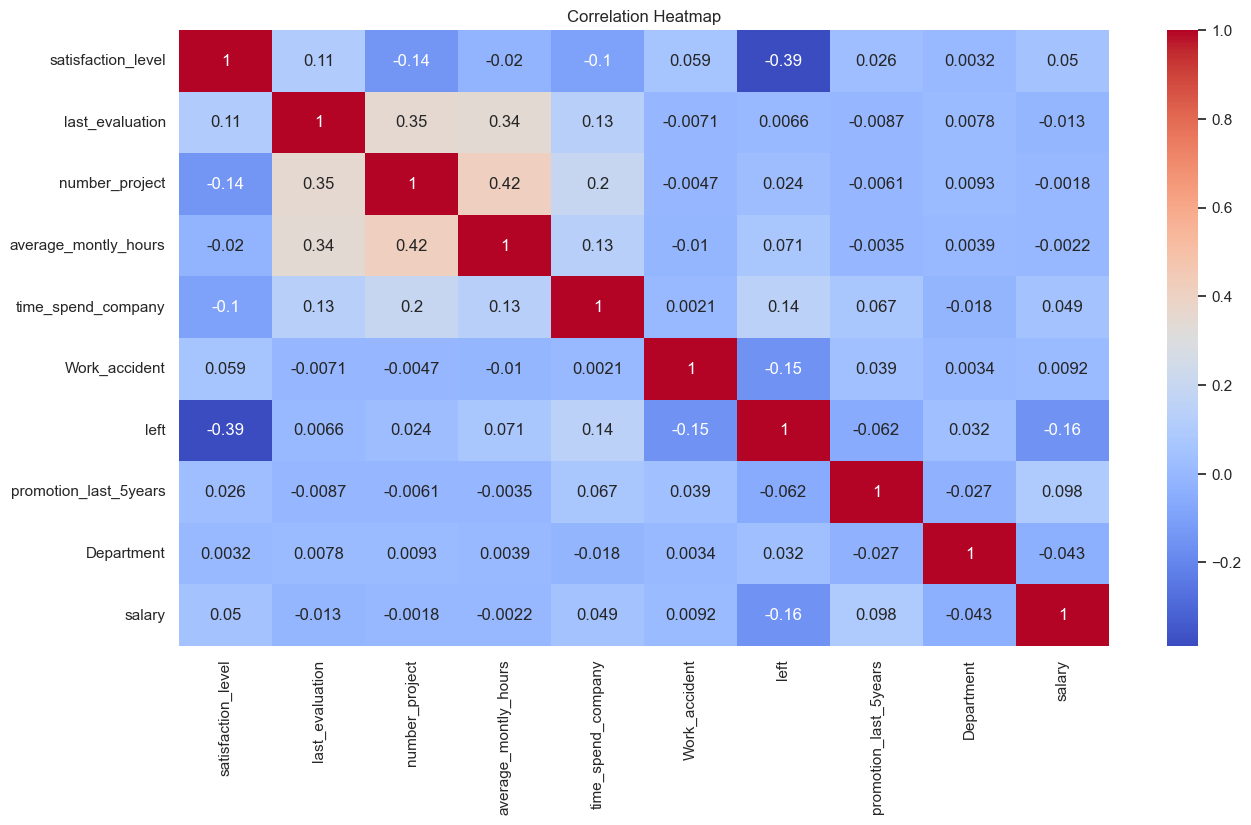

In [35]:
# Set the size of the seaborn plots
sns.set(rc= {'figure.figsize':(15,8)})

# Compute and plot the correlation matrix for the dataset
corr = hr_data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

*Correlation heatmap shows relationships between variables. Here, 'left' is the target column.*
*No single feature is highly correlated with 'left', so all features will be considered later.*

### ***Investigating various graphs/charts that, how the given features affect the target variable.***

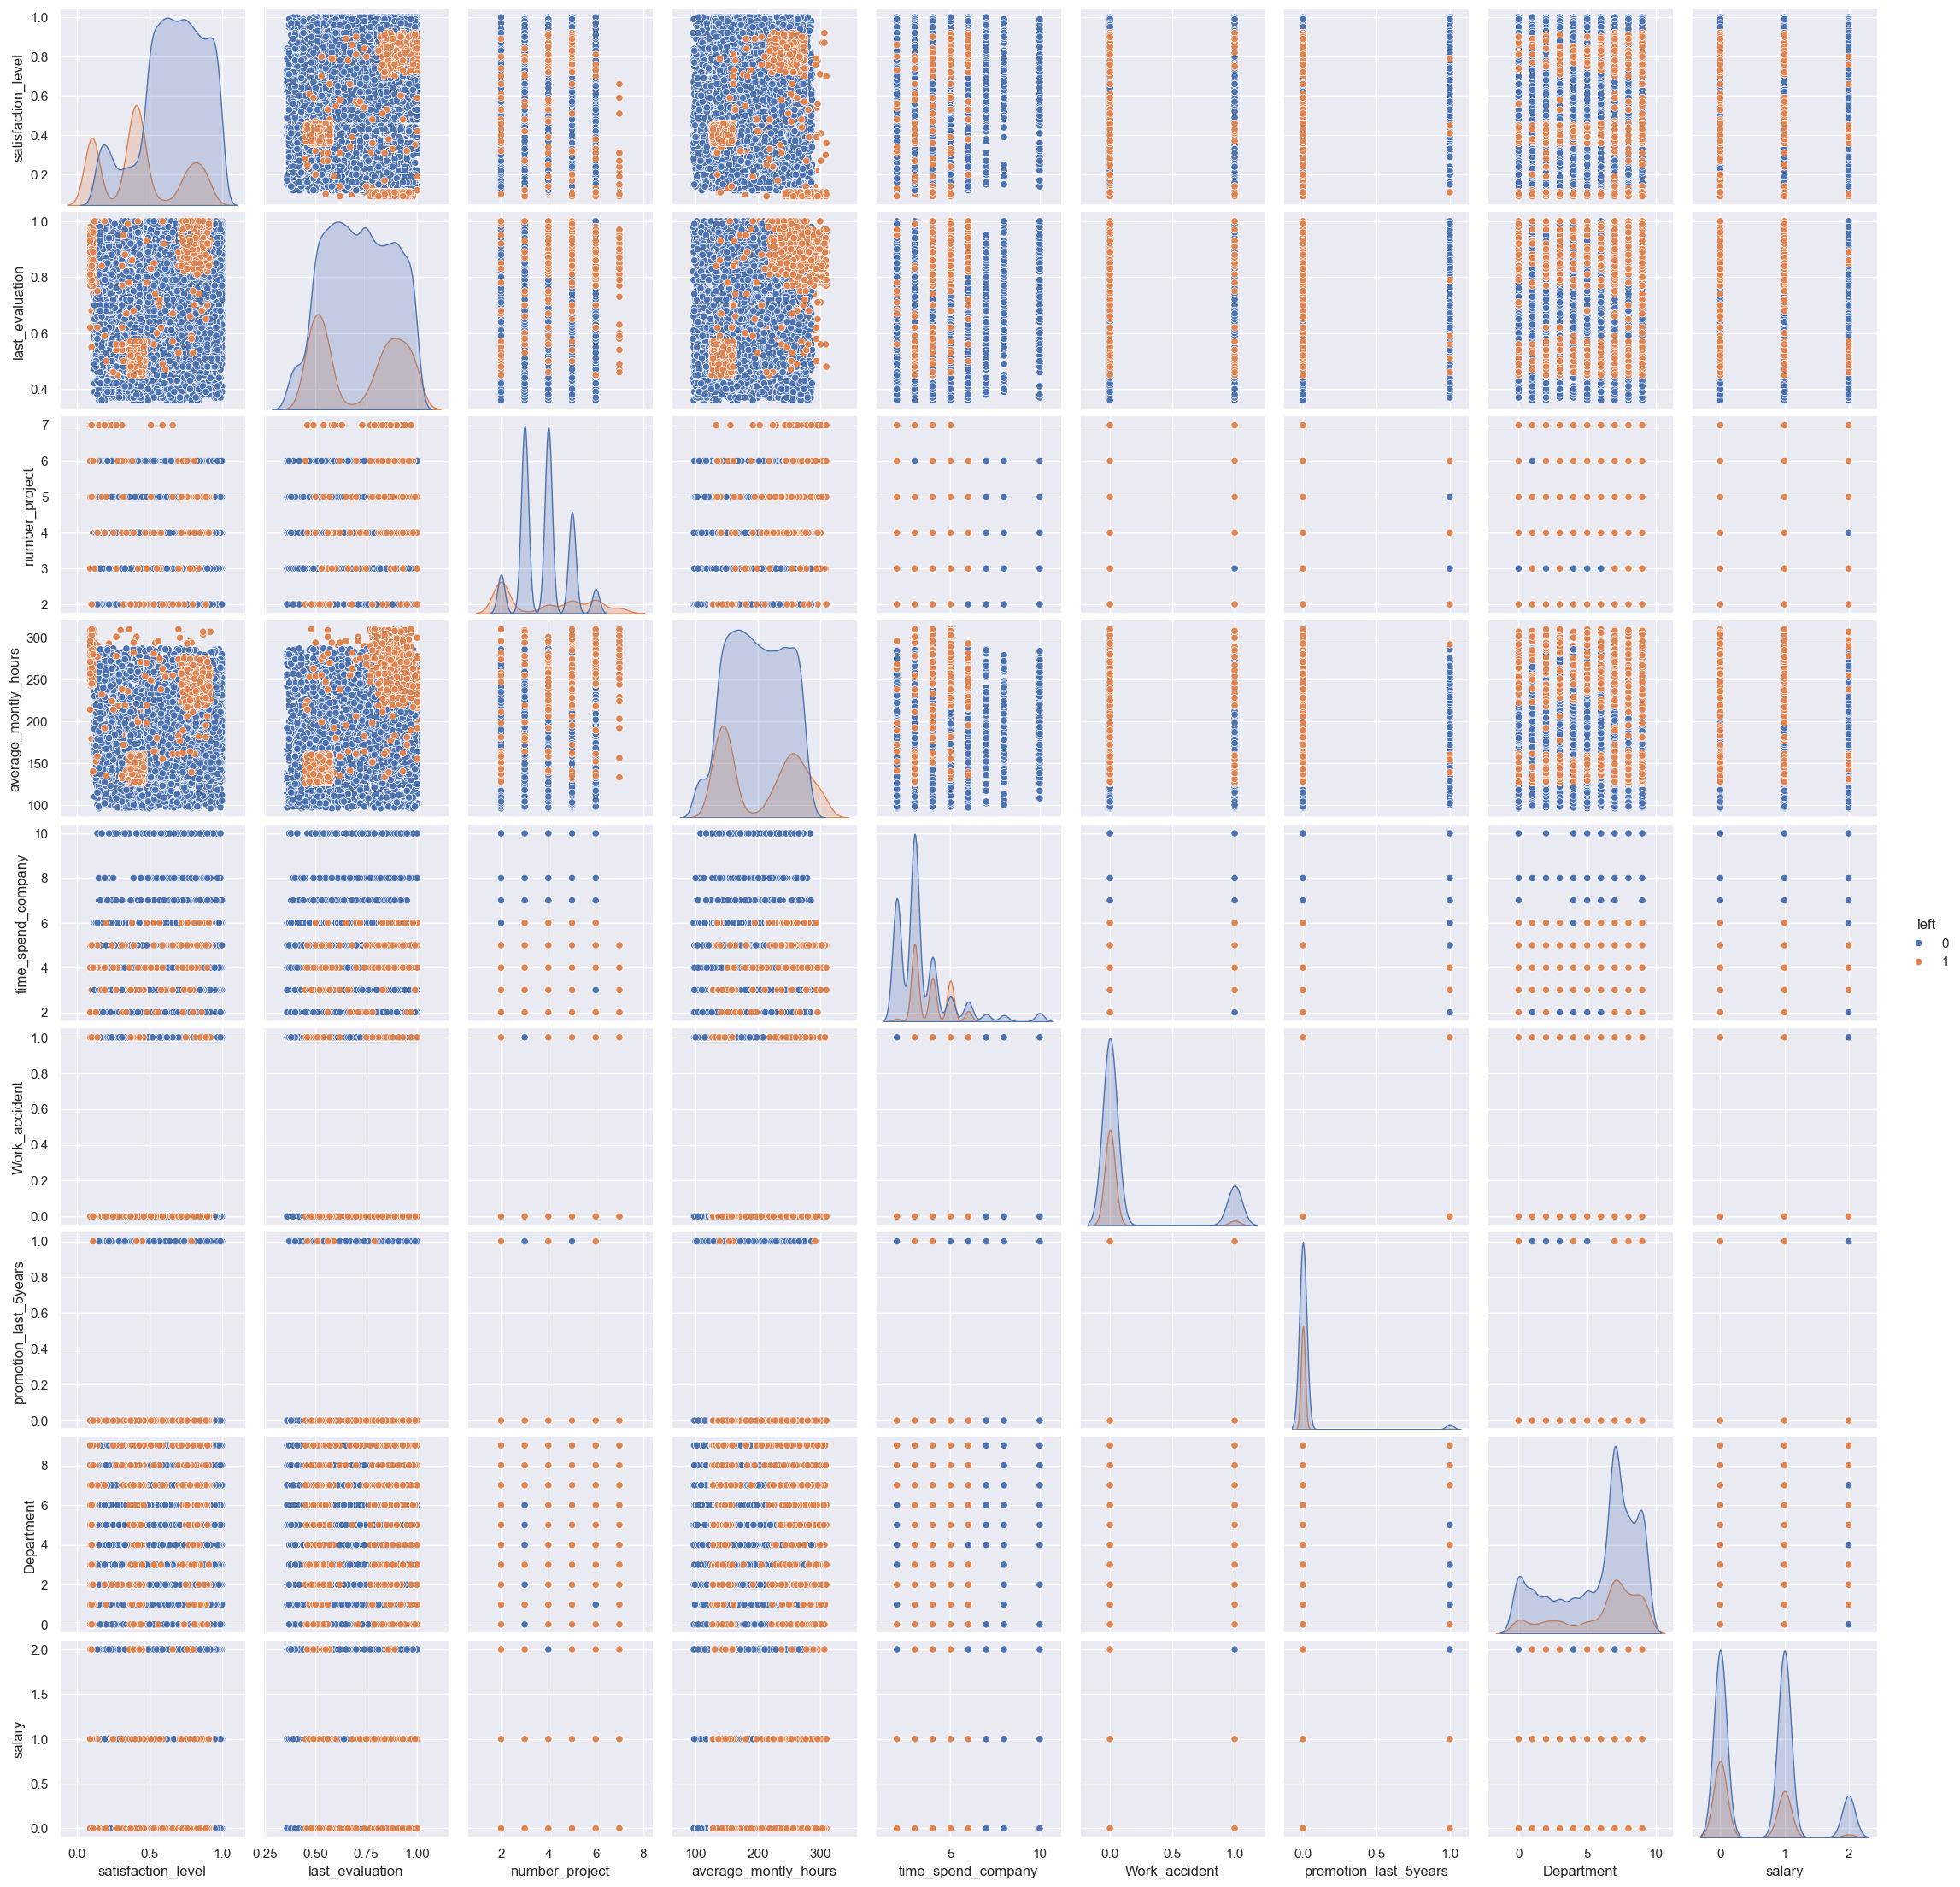

In [38]:
# Pairwise plot of all features, using 'left' as the hue to separate points into two classes (left or stayed)
sns.pairplot(hr_data,hue="left")

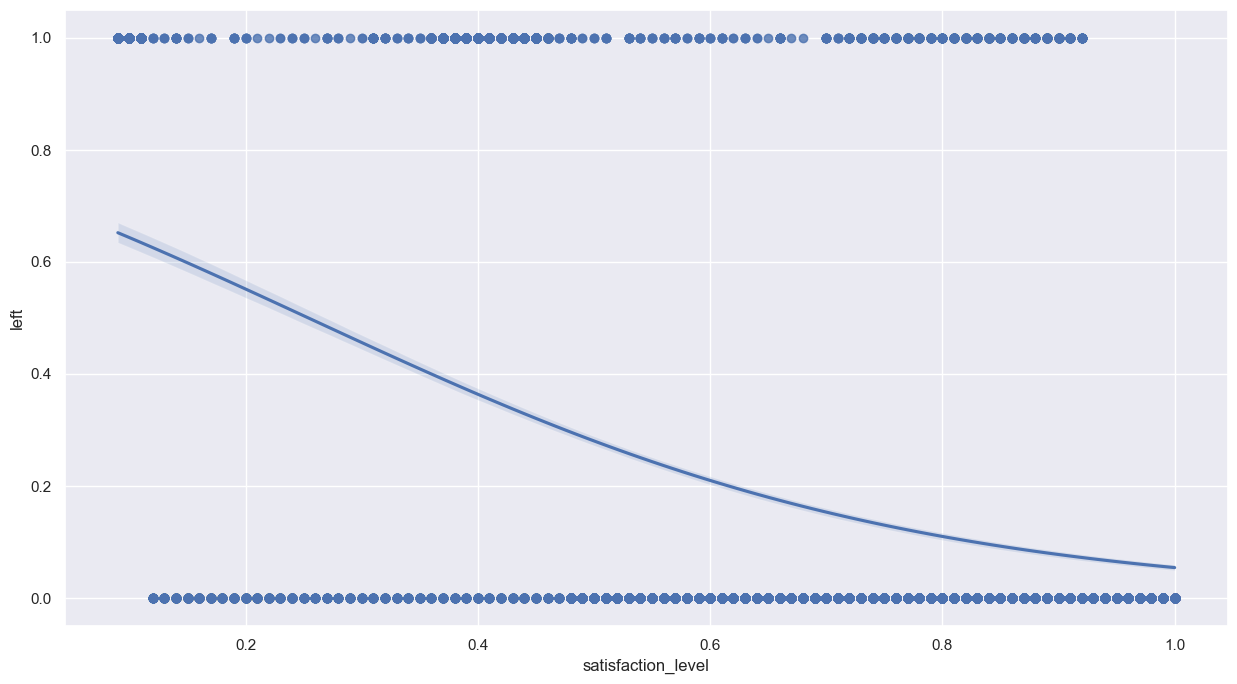

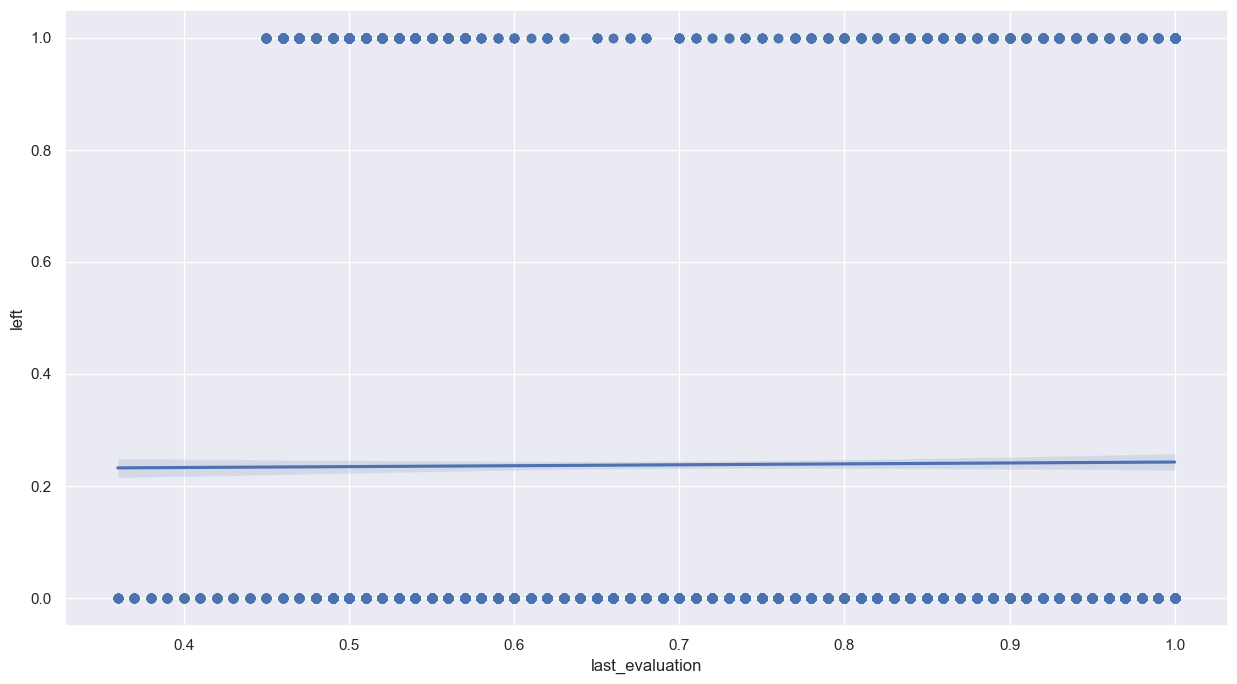

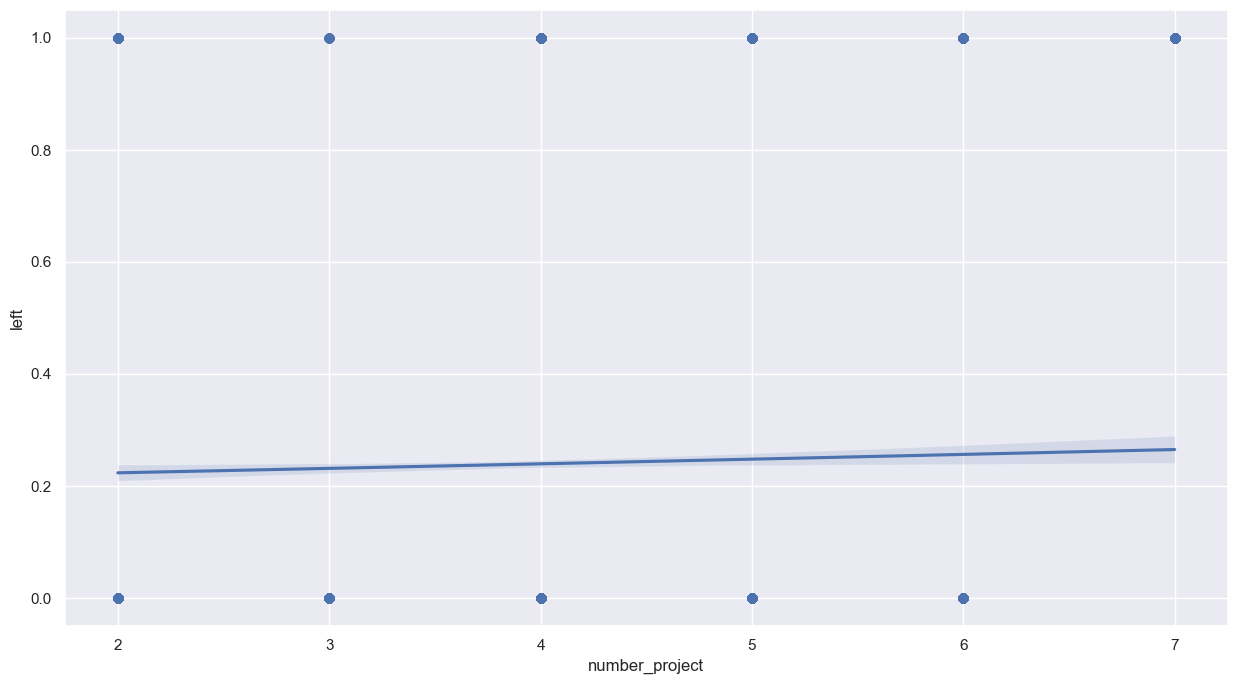

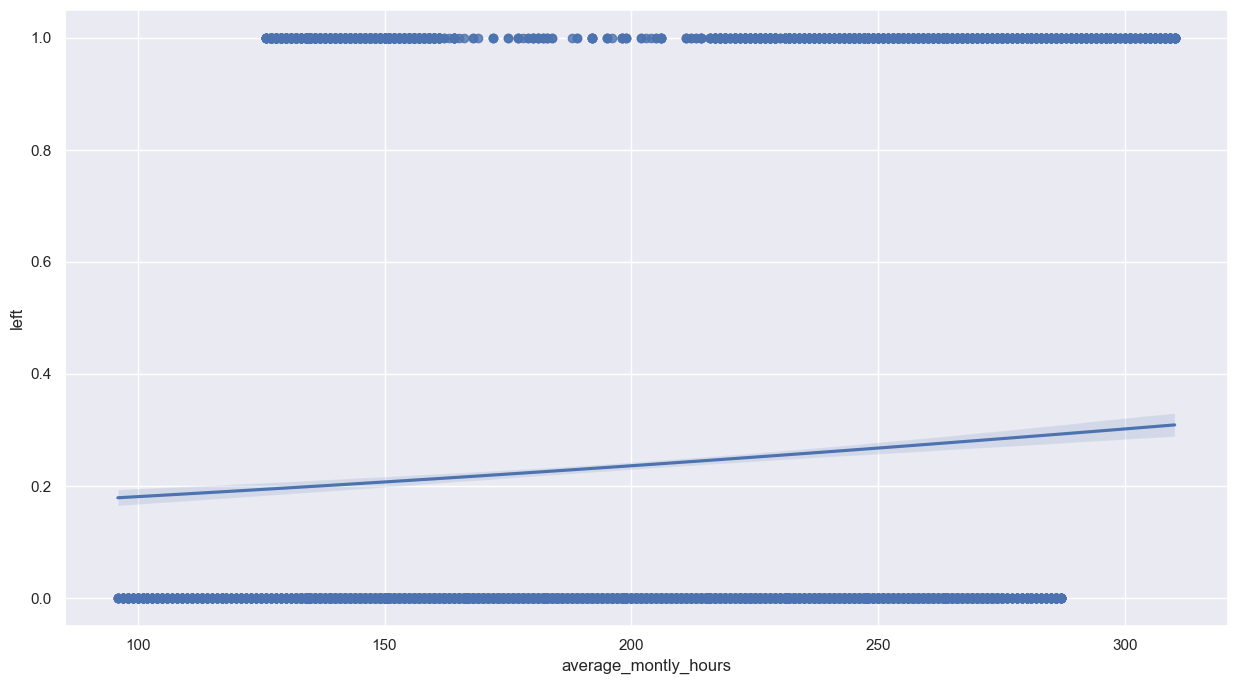

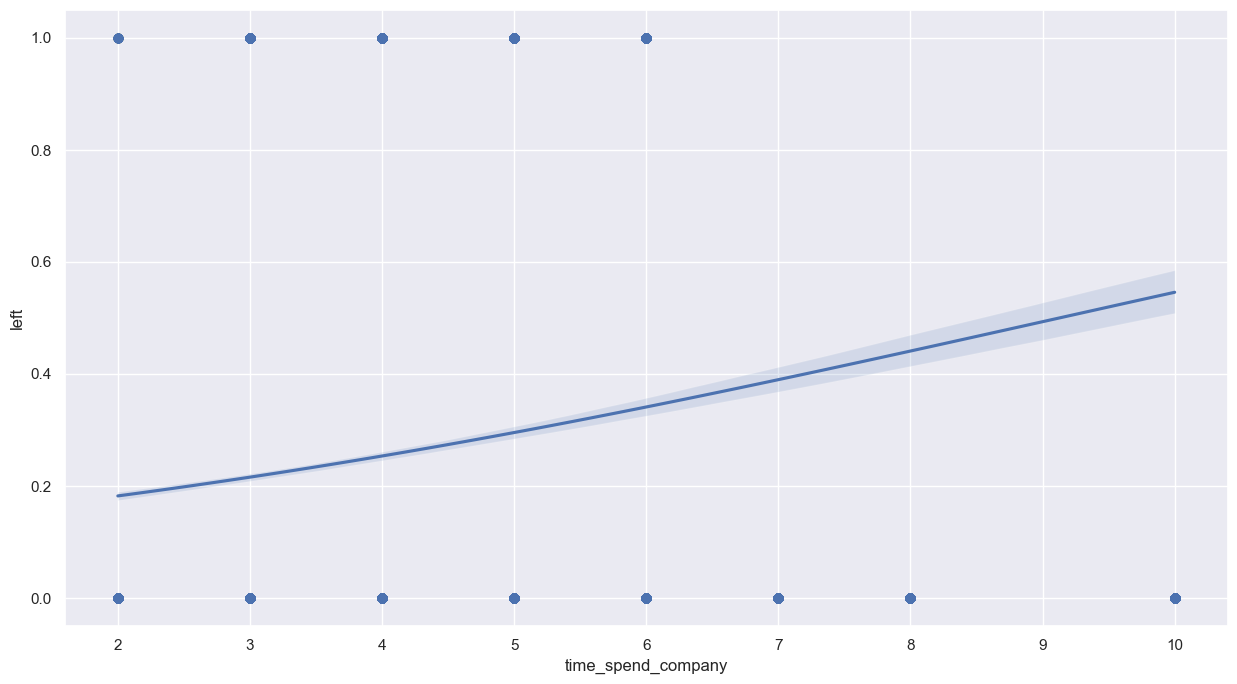

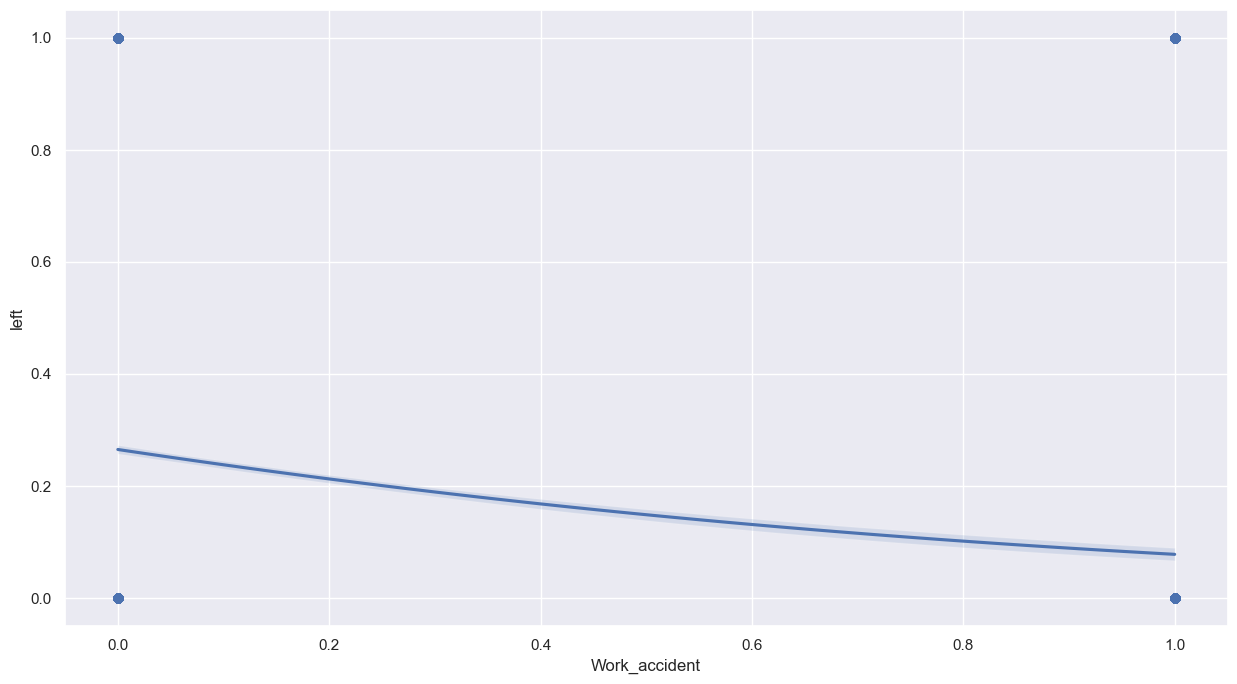

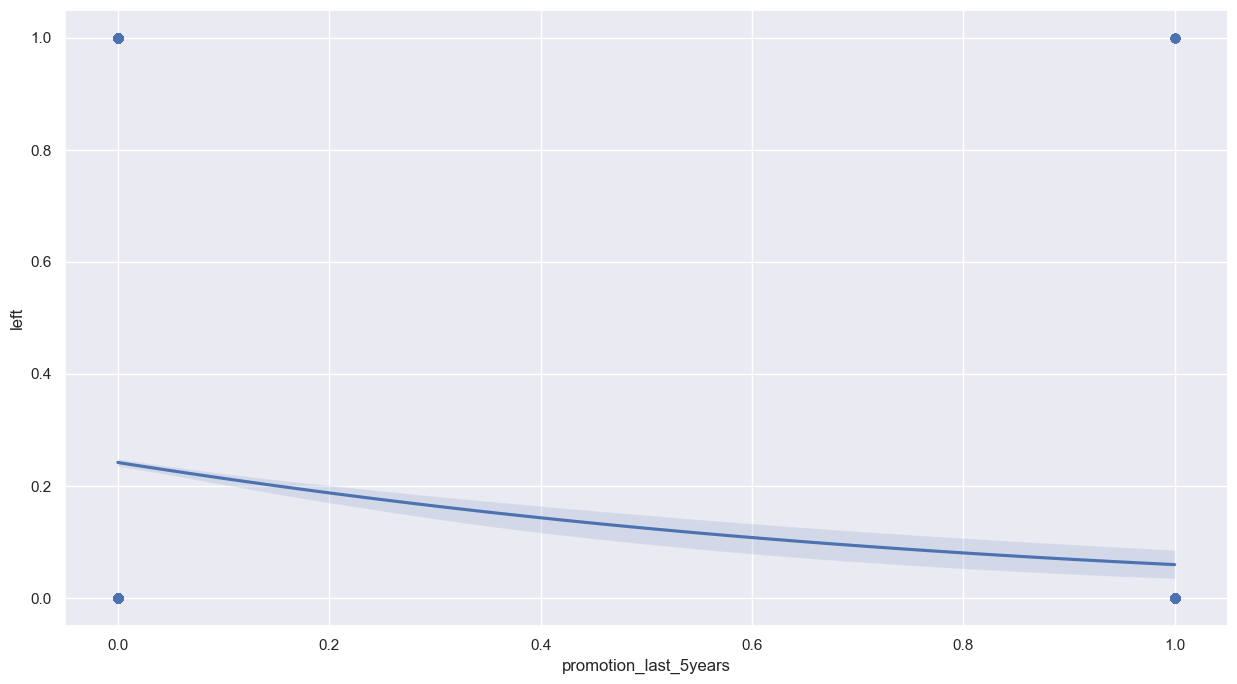

In [39]:
# Visualize relationships between individual features and the target 'left' using logistic regression lines
col=['satisfaction_level','last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years']
for i in col:
    sns.regplot(x=i, y="left", data=hr_data, logistic=True)
    plt.xlabel(i)
    plt.ylabel("left")
    plt.show()

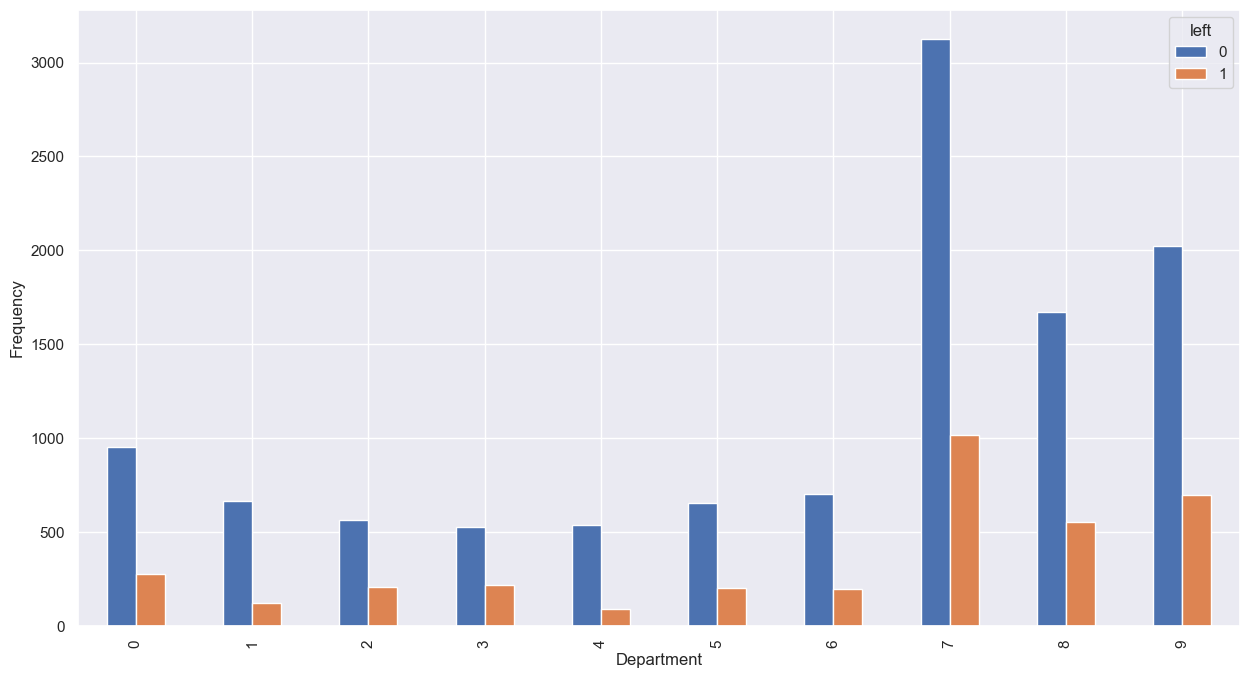

In [40]:
# Bar plot showing how many employees from each department have left or stayed
pd.crosstab(hr_data['Department'], hr_data['left']).plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.show()

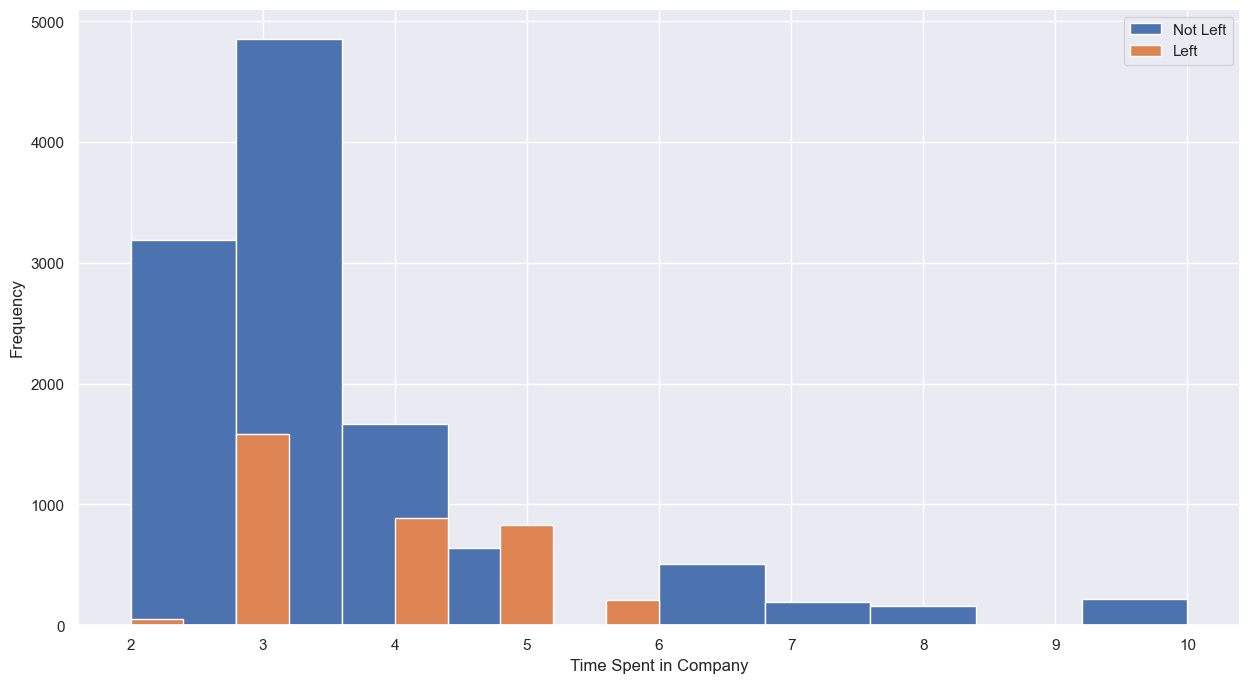

In [41]:
# Plot histograms of the time spent at the company, separating employees who stayed vs. those who left
plt.hist(hr_data[hr_data['left'] == 0]['time_spend_company'], label='Not Left')
plt.hist(hr_data[hr_data['left'] == 1]['time_spend_company'], label='Left')
plt.xlabel('Time Spent in Company')
plt.ylabel('Frequency')
plt.legend()
plt.show()

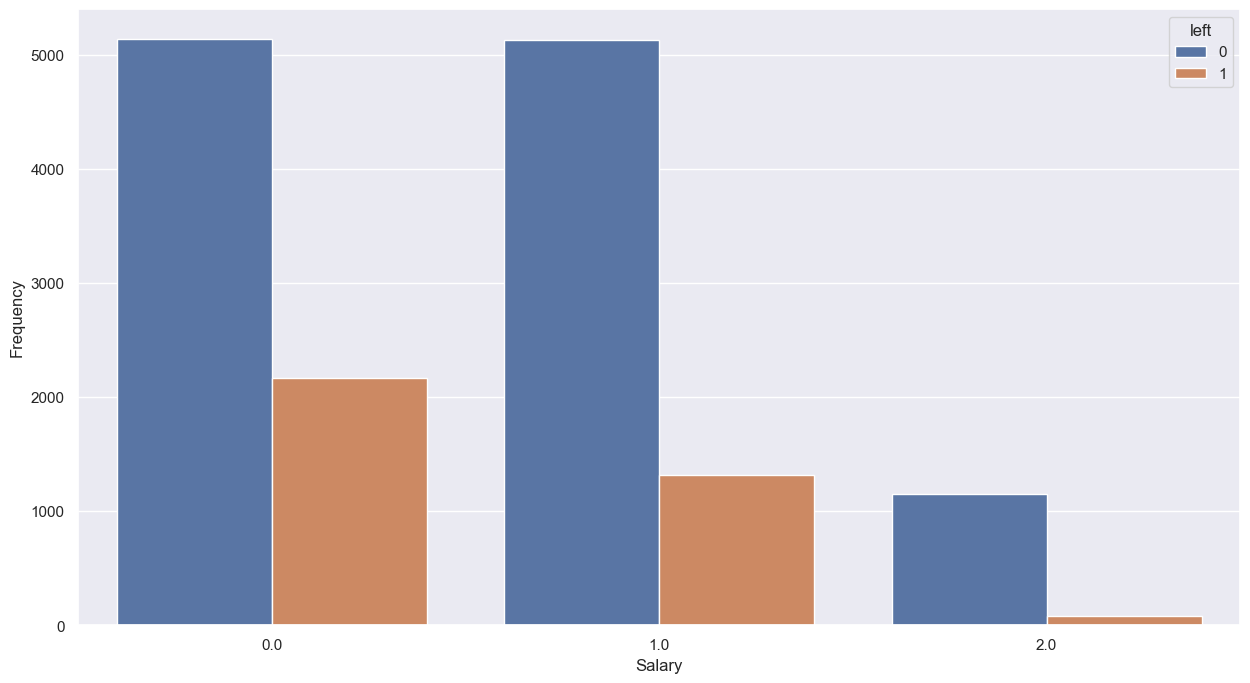

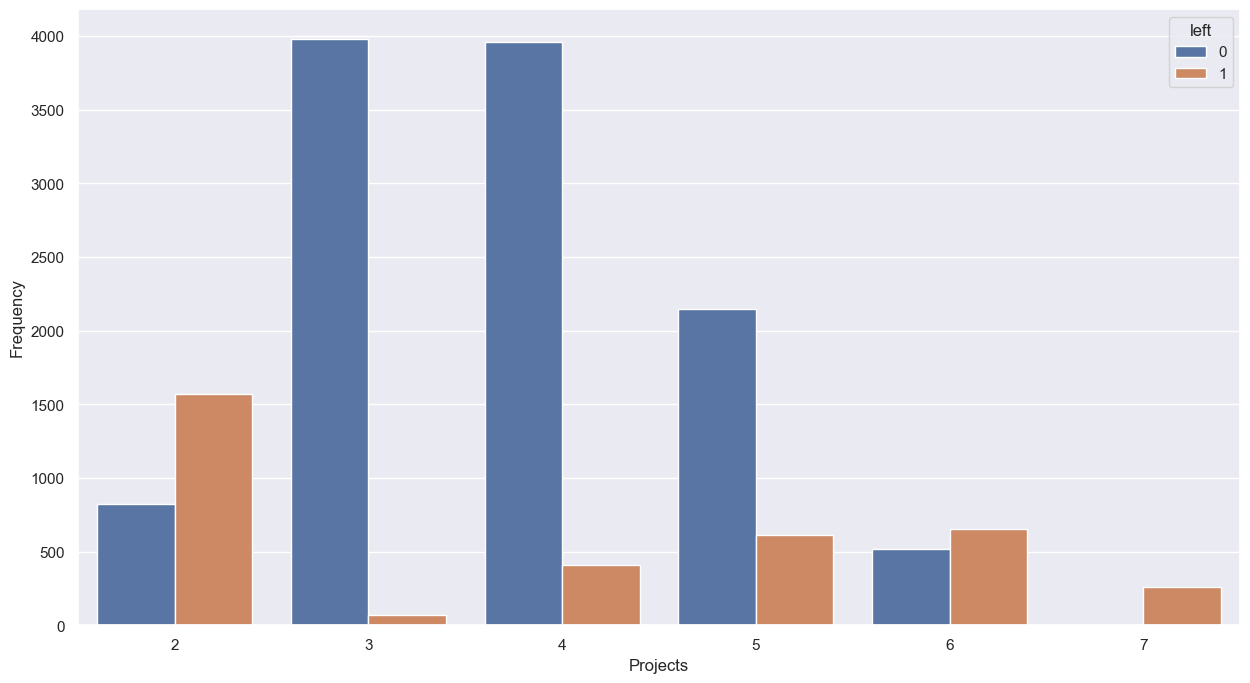

In [42]:
# Count plot showing salary distribution for employees who stayed and left
sns.countplot(x='salary', hue='left', data=hr_data)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Count plot showing how many projects employees who left and stayed worked on
sns.countplot(x='number_project', hue='left', data=hr_data)
plt.xlabel('Projects')
plt.ylabel('Frequency')
plt.show()

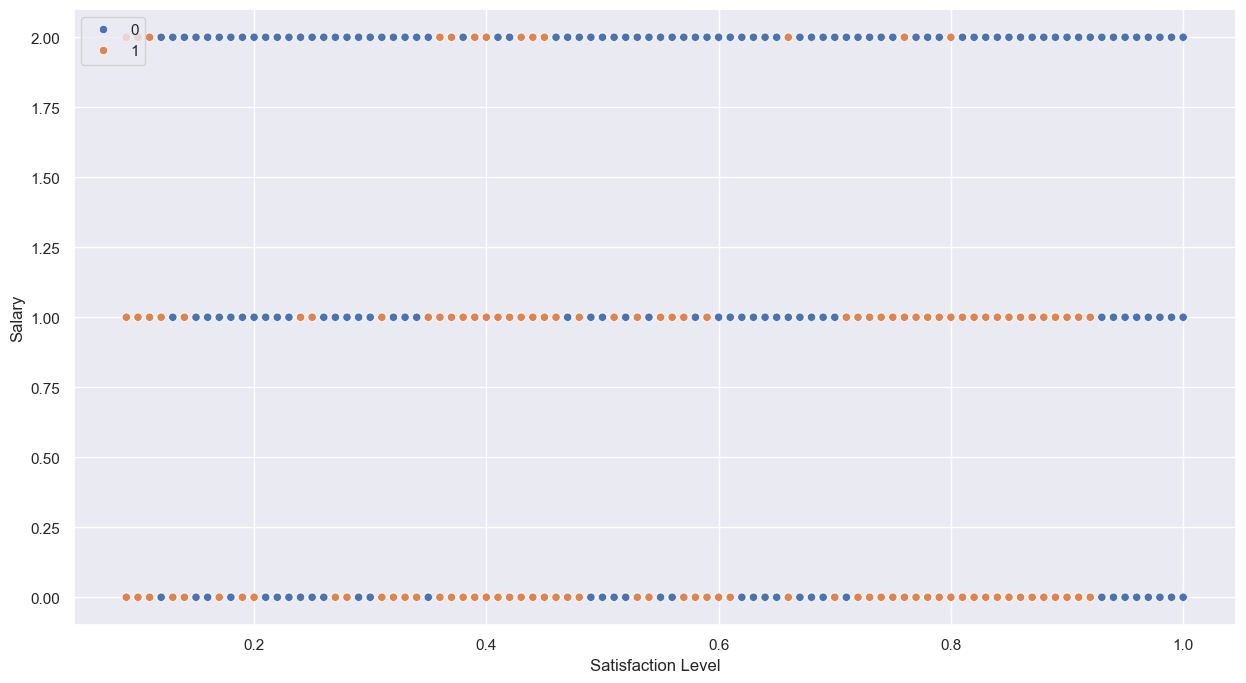

In [43]:
sns.scatterplot(x="satisfaction_level",y="salary",hue="left",data=hr_data)
plt.xlabel('Satisfaction Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

**Observation:**

*Employees with high salaries are more likely to stay, while those with low salaries are more likely to leave.*

*Employees working on a very high number of projects (7 or more) are more likely to leave the company.*

*Number of employees working in the sales, technical and support department left than the other departments.*

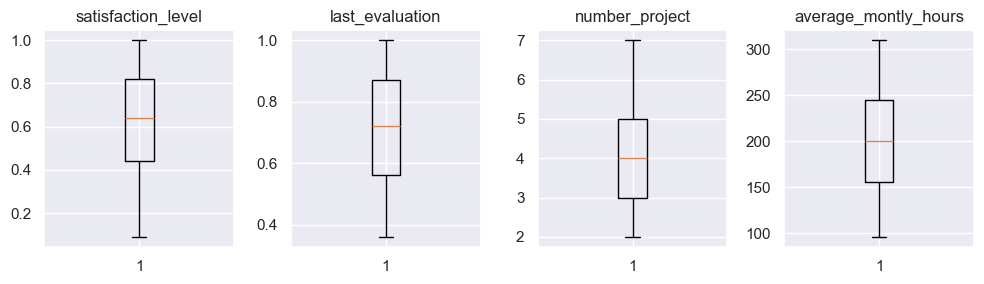

In [45]:
# Checking outliers for continous data

# Creates subplots
fig, axs = plt.subplots(1, 4, figsize=(10, 3))


axs[0].boxplot(hr_data["satisfaction_level"])
axs[0].set_title("satisfaction_level")

axs[1].boxplot(hr_data["last_evaluation"])
axs[1].set_title("last_evaluation")

axs[2].boxplot(hr_data['number_project'])
axs[2].set_title("number_project")

axs[3].boxplot(hr_data['average_montly_hours'])
axs[3].set_title("average_montly_hours")


# Adjusts layout
plt.tight_layout()
plt.show()

**Observation:**

*We can conclude from the box plot that there are no outliers in the satisfaction_level, last_eveluation, number_project and average_monthly_hours features*

### ***Choosing several features and building an sklearn logistic regression model predicting the target variable “left”.***

In [48]:
# Based on the correlation matrix, no single feature has a strong correlation with the 'left' column.

from sklearn.preprocessing import MinMaxScaler

# Split data into features (X) and target (y)
X=hr_data.drop("left", axis=1)
y=hr_data["left"]

# Logistic regression model
model = LogisticRegression(max_iter=10_000)


# Split dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [49]:
X_train.count()

satisfaction_level       10499
last_evaluation          10499
number_project           10499
average_montly_hours     10499
time_spend_company       10499
Work_accident            10499
promotion_last_5years    10499
Department               10499
salary                   10499
dtype: int64

In [50]:
X_test.count()

satisfaction_level       4500
last_evaluation          4500
number_project           4500
average_montly_hours     4500
time_spend_company       4500
Work_accident            4500
promotion_last_5years    4500
Department               4500
salary                   4500
dtype: int64

In [51]:
# Normalize the data using MinMaxScaler to scale feature values between 0 and 1
scaler = MinMaxScaler().fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Train the logistic regression model
model.fit(X_train_scaled,y_train)

# Evaluate the model on training data
model.score(X_train_scaled,y_train)


0.7932184017525479

In [52]:
# Predict on the test set
y_pred=model.predict(X_test_scaled)

# Evaluate the model on test data
model.score(X_test_scaled,y_test)

0.796

### ***Model performance (the confusion matrix and the classification report) on the test set.***

In [54]:
# Generate a classification report and confusion matrix to analyze model performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[3195,  229],
       [ 689,  387]])

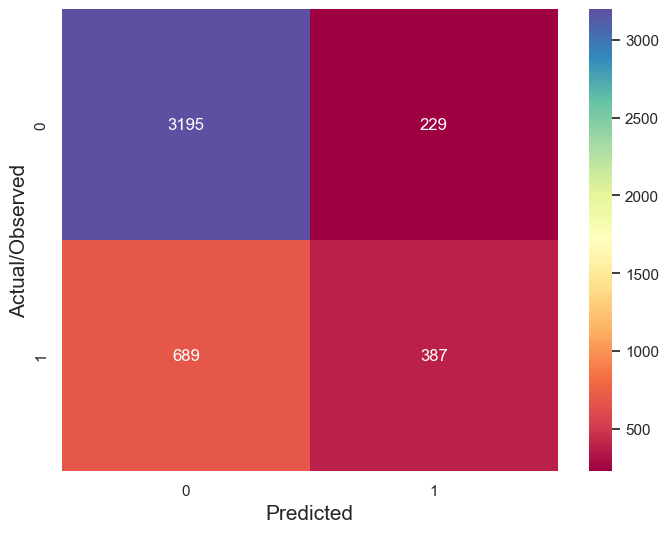

In [55]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize = (8,6))

sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [56]:
# Print classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3424
           1       0.63      0.36      0.46      1076

    accuracy                           0.80      4500
   macro avg       0.73      0.65      0.67      4500
weighted avg       0.78      0.80      0.77      4500



The logistic regression model achieved around 79.6% accuracy on the test set.